In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [2]:
data=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hu_12_formations_points.csv')

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
data.columns[60:]

Index(['HUC_10', 'HUC_12', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS',
       'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS',
       ...
       'Washakie Formation', 'Water', 'Wayan and Smiths Formations',
       'Wells and Amsden Formations (TB), or Casper Formation and Madison Limestone (N, S)',
       'White River Formation',
       'Wilkins Peak Member and Tipton Shale Member or Tongue of Green River Formation',
       'Wilkins Peak Member of Green River Formation', 'Willwood Formation',
       'Wind River Formation - at base locally includes equivalent of Indian Meadows Formation',
       'Wind River and Indian Meadows Formations'],
      dtype='object', length=228)

In [18]:
X = data.iloc[0:, 0:51].values

In [19]:
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

#y = data.iloc[0:,82:].values #train data for multilabel problem
y = data.HUC_12
lb.fit(y)
y_transformed=lb.transform(y)
#ybinarized = Binarizer().fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.5, random_state=86)

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [45]:
#multi class learner predicting on HUC_12 to classify location based on geochemistry
scores0=[]
for i in range(1,50):
    clf=ExtraTreesClassifier(n_estimators=5, max_features=51, n_jobs=-1)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores0.append(accuracy_score(y_test.astype(int), preds, normalize=True))

KeyboardInterrupt: 

In [22]:
clf=ExtraTreesClassifier(n_estimators=50, max_features=50, n_jobs=3)
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
accuracy_score(y_test.astype(int), preds, normalize=True)

0.12376506351101943

In [23]:
plt.plot(score)

NameError: name 'score' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=51, max_features=51, n_jobs=-1)
models = clf.fit(X_train, y_train.astype(int))
preds=models.predict(X_test)
accuracy_score(y_test.astype(int), preds, normalize=True)

In [ ]:
plt.plot(y)

array([1428, 1864,  141, ..., 1057,  739,  533], dtype=int64)

In [ ]:
from tpot import TPOTClassifier
tpot=TPOTClassifier(generations=100, population_size=200, verbosity=20, scoring='f1_micro', n_jobs=-1)
tpot.fit(X_train, y_train)

29 operators have been imported by TPOT.


Skipped pipeline #29 due to time out. Continuing to the next pipeline.


Skipped pipeline #33 due to time out. Continuing to the next pipeline.


Skipped pipeline #36 due to time out. Continuing to the next pipeline.


Skipped pipeline #38 due to time out. Continuing to the next pipeline.


Skipped pipeline #40 due to time out. Continuing to the next pipeline.


Skipped pipeline #44 due to time out. Continuing to the next pipeline.


Skipped pipeline #47 due to time out. Continuing to the next pipeline.


Skipped pipeline #49 due to time out. Continuing to the next pipeline.


Skipped pipeline #51 due to time out. Continuing to the next pipeline.


Skipped pipeline #53 due to time out. Continuing to the next pipeline.


Skipped pipeline #55 due to time out. Continuing to the next pipeline.


Skipped pipeline #57 due to time out. Continuing to the next pipeline.


Skipped pipeline #60 due to time out. Continuing to the next pipeline.


Skipped pipeline #62 due to time out. Continuing to the next pipeline.


Skipped pipeline #64 due to time out. Continuing to the next pipeline.


Skipped pipeline #67 due to time out. Continuing to the next pipeline.


Skipped pipeline #70 due to time out. Continuing to the next pipeline.


Skipped pipeline #74 due to time out. Continuing to the next pipeline.


Skipped pipeline #80 due to time out. Continuing to the next pipeline.


Skipped pipeline #82 due to time out. Continuing to the next pipeline.


Skipped pipeline #86 due to time out. Continuing to the next pipeline.


Skipped pipeline #89 due to time out. Continuing to the next pipeline.


Skipped pipeline #91 due to time out. Continuing to the next pipeline.


Skipped pipeline #95 due to time out. Continuing to the next pipeline.


Skipped pipeline #97 due to time out. Continuing to the next pipeline.


Skipped pipeline #99 due to time out. Continuing to the next pipeline.


Skipped pipeline #101 due to time out. Continuing to the next pipeline.


Skipped pipeline #103 due to time out. Continuing to the next pipeline.


Skipped pipeline #106 due to time out. Continuing to the next pipeline.


Skipped pipeline #108 due to time out. Continuing to the next pipeline.


Skipped pipeline #111 due to time out. Continuing to the next pipeline.


Skipped pipeline #113 due to time out. Continuing to the next pipeline.


Skipped pipeline #115 due to time out. Continuing to the next pipeline.


Skipped pipeline #117 due to time out. Continuing to the next pipeline.


Skipped pipeline #121 due to time out. Continuing to the next pipeline.


Skipped pipeline #123 due to time out. Continuing to the next pipeline.


Skipped pipeline #127 due to time out. Continuing to the next pipeline.


Skipped pipeline #134 due to time out. Continuing to the next pipeline.


Skipped pipeline #136 due to time out. Continuing to the next pipeline.


Skipped pipeline #138 due to time out. Continuing to the next pipeline.


Skipped pipeline #140 due to time out. Continuing to the next pipeline.


Skipped pipeline #142 due to time out. Continuing to the next pipeline.


Skipped pipeline #144 due to time out. Continuing to the next pipeline.


Skipped pipeline #150 due to time out. Continuing to the next pipeline.


Skipped pipeline #152 due to time out. Continuing to the next pipeline.


Skipped pipeline #154 due to time out. Continuing to the next pipeline.


Skipped pipeline #158 due to time out. Continuing to the next pipeline.


Skipped pipeline #160 due to time out. Continuing to the next pipeline.


Skipped pipeline #164 due to time out. Continuing to the next pipeline.


Skipped pipeline #169 due to time out. Continuing to the next pipeline.


Skipped pipeline #171 due to time out. Continuing to the next pipeline.


Skipped pipeline #173 due to time out. Continuing to the next pipeline.


Skipped pipeline #175 due to time out. Continuing to the next pipeline.


Skipped pipeline #179 due to time out. Continuing to the next pipeline.


Skipped pipeline #181 due to time out. Continuing to the next pipeline.


Skipped pipeline #185 due to time out. Continuing to the next pipeline.


Skipped pipeline #191 due to time out. Continuing to the next pipeline.


Skipped pipeline #193 due to time out. Continuing to the next pipeline.


Skipped pipeline #195 due to time out. Continuing to the next pipeline.


Skipped pipeline #199 due to time out. Continuing to the next pipeline.


Skipped pipeline #202 due to time out. Continuing to the next pipeline.


Skipped pipeline #204 due to time out. Continuing to the next pipeline.


Skipped pipeline #207 due to time out. Continuing to the next pipeline.


Skipped pipeline #210 due to time out. Continuing to the next pipeline.


Skipped pipeline #212 due to time out. Continuing to the next pipeline.


Skipped pipeline #215 due to time out. Continuing to the next pipeline.


Skipped pipeline #218 due to time out. Continuing to the next pipeline.


Skipped pipeline #225 due to time out. Continuing to the next pipeline.


Skipped pipeline #228 due to time out. Continuing to the next pipeline.


Skipped pipeline #232 due to time out. Continuing to the next pipeline.


Skipped pipeline #236 due to time out. Continuing to the next pipeline.


Skipped pipeline #239 due to time out. Continuing to the next pipeline.


Skipped pipeline #242 due to time out. Continuing to the next pipeline.


Skipped pipeline #244 due to time out. Continuing to the next pipeline.


Skipped pipeline #246 due to time out. Continuing to the next pipeline.


Optimization Progress:   1%|▌                                         | 246/20200 [7:33:35<930:40:22, 167.91s/pipeline]

In [33]:
 prediction = tpot.score(X_test, y_test)

True

In [11]:
#clf=KNeighborsClassifier(n_neighbors=i, weights='uniform')
#clf=ExtraTreesClassifier(n_estimators=i, max_features=30)

scores=[]
for i in range(1,20,5):
    clf=ExtraTreesClassifier(n_estimators=i, max_features=30)
    models = clf.fit(X_train, y_train.astype(int))
    preds=models.predict(X_test)
    scores.append(accuracy_score(y_test.astype(int), preds, normalize=True))
    

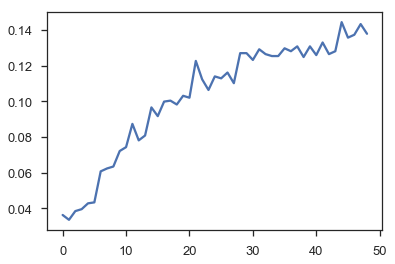

In [11]:
plt.plot(scores0)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        preds[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], preds[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    preds.ravel())
average_precision["micro"] = average_precision_score(y_test, preds,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.68


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.68')

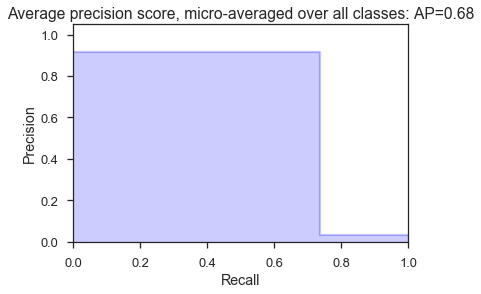

In [19]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype(int), preds, normalize=True)

0.3336950623982637

In [146]:
from sklearn.model_selection import GridSearchCV

In [157]:
etc=ExtraTreesClassifier()
parameters={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50], 'max_features':[1,5,10,15,20,25,30,35,45,50]}

In [158]:
clf=GridSearchCV(etc, parameters)

In [159]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': [1, 5, 10, 15, 20, 25, 30, 35, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
tuned=clf.fit(X_train, y_train.astype(int))

In [161]:
tuned_predictions=tuned.predict(X_test)

In [164]:
accuracy_score(y_test.astype(int), tuned_predictions, normalized=False)

1038

In [172]:
tuned.results()

AttributeError: 'GridSearchCV' object has no attribute 'results'

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [110]:
nn=Sequential()
nn.add(Dense(10, activation='softmax', input_shape=(51,)))
nn.add(Dropout(0.8))
nn.add(Dense(1, activation='sigmoid'))

#nn.add(Dropout(0.2))
#nn.add(Dense(208, activation='sigmoid'))
#nn.add(Dropout(0.1))
#nn.add(Dense(208, activation='sigmoid'))
#nn.add(Dropout(0.3))


In [111]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_crossentropy'])

In [112]:
from keras import utils
dummy_y = utils.to_categorical(y_train)

In [113]:
dummy_y.shape


(14736, 2175)

In [114]:
history=nn.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, validation_data=(X_test, y_test), shuffle=True,
              verbose=0)

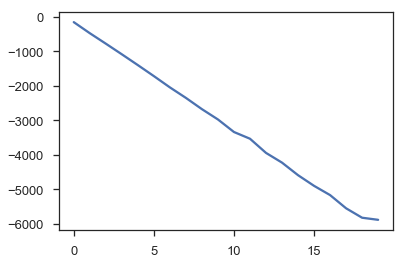

In [115]:
plt.plot(history.history['loss'])

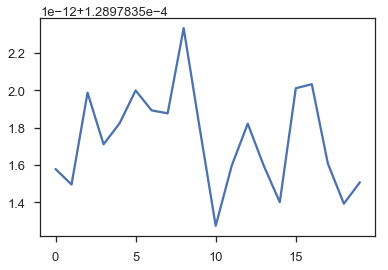

In [117]:
plt.plot(history.history['categorical_crossentropy'])

In [118]:
neural=nn.predict(X_test)
neural[0]


array([0.99667454], dtype=float32)

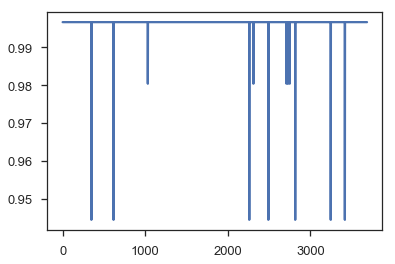

In [119]:
nbin = Binarizer(threshold=0.05).fit_transform(neural)
plt.plot(neural)


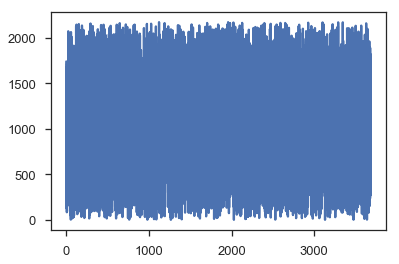

In [100]:
plt.plot(y_test)

In [101]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=30)

# train
classifier.fit(X_train, y_train)

# predict
predictions = np.asarray(classifier.predict(X_test).todense())


IndexError: Index (0) out of range -1 to 0.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes = y_train.shape[1]

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[i,:],
                                                        predictions[i,:])
    average_precision[i] = average_precision_score(y_test[i,:], predictions[i,:])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    predictions.ravel())
average_precision["micro"] = average_precision_score(y_test, predictions,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [ ]:
'''
number of counts of a formation where the element value is in some range
divde that number by the total count of the formation = P(Formation|Element)

number of counts of element in some range divided by total number of counts P(Element)

number of counts of formation divided by total number of counts P(Formation)
'''

In [72]:
((data[(data['Meeteetse Formation']>0) & (data['co_ppm']>1.)].shape[0]/data[(data['Meeteetse Formation']>0)].shape[0])*
data[data['co_ppm']>1.].shape[0]/data.shape[0])/data[(data['Meeteetse Formation']>0.)].shape[0]/data.shape[0]

9.986710467791537e-08

In [101]:
#P(Fm|Element)
FmEl=data[(data['Meeteetse Formation']>0) & (data['co_ppm']>20.)].shape[0]/data[(data['co_ppm']>20)].shape[0]

In [102]:
#P(Element)
El=data[data['co_ppm']>20.].shape[0]/data.shape[0]

In [103]:
#P(Formation)
Fm=data[(data['Meeteetse Formation']>0.)].shape[0]/data.shape[0]

In [104]:
(FmEl*El)/Fm

0.017241379310344827

In [157]:
for elemental in data.columns[0:51]:
    for i in range(np.round(max(data[elemental])).astype(int)):
        FmElIndex=data[(data['Meeteetse Formation']>0) & (data[elemental]>i)].index.values
        FmEl=data[(data['Meeteetse Formation']>0) & (data[elemental]>i)].shape[0]/data[(data[elemental]>i)].shape[0]
        El=data[data[elemental]>i].shape[0]/data.shape[0]
        Fm=data[(data['Meeteetse Formation']>0.)].shape[0]/data.shape[0]
        d2.loc[FmElIndex,elemental]=(FmEl*El)/Fm

    

KeyboardInterrupt: 

In [217]:
prob=[]
for i in  range(np.round(min(data['co_ppm'])).astype(int),np.round(max(data['co_ppm'])).astype(int),
                np.round(max(data['co_ppm'])/100).astype(int)):
    j=i+np.round(max(data['ba_ppm'])/10).astype(int)
    try:
        FmEl=data[(data['Meeteetse Formation']>0) & (data['co_ppm']>i) & (j>data['co_ppm'])].shape[0]/data[(data['co_ppm']>i)& (j>data['co_ppm'])].shape[0]
        El=data[(data['co_ppm']>i)& (j>data['co_ppm'])].shape[0]/data.shape[0]
        Fm=data[(data['Meeteetse Formation']>0.)].shape[0]/data.shape[0]
        prob.append((FmEl*El)/Fm)
    except:
        prob.append(0.0001)

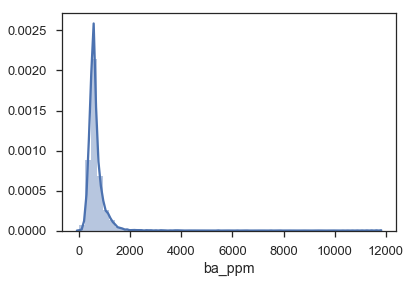

In [4]:
sns.distplot(data['ba_ppm'])

In [ ]:
#this section runs through each HUC and calculates the bayesian probability of element value given a formation
prob=[]
bins=[]
huc=[]
for basin in data['HUC_12'].unique():
    d3=data[data['HUC_12']==basin]
    pre=[]
    smallbin=[]
    for i in  range(np.round(min(d3['ba_ppm'])).astype(int),np.round(max(d3['ba_ppm'])).astype(int)):
        j=i+100 #np.round(max(d3['co_ppm'])/10).astype(int)
        try:
            FmEl=d3[(d3['Meeteetse Formation']>0) & (d3['ba_ppm']>i) & (j>d3['ba_ppm'])].shape[0]/d3[(d3['ba_ppm']>i)& (j>d3['ba_ppm'])].shape[0]
            El=d3[(d3['ba_ppm']>i)& (j>d3['ba_ppm'])].shape[0]/d3.shape[0]
            Fm=d3[(d3['Meeteetse Formation']>0.)].shape[0]/d3.shape[0]
            pre.append((FmEl*El)/Fm)
        except:
            pre.append(0.000001)
        smallbin.append(j)
        huc.append(basin)
    bins.append(smallbin)
    prob.append(pre)
    

In [300]:
import geopandas as gpd

huc8=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc8= huc8.to_crs({'init': 'epsg:3732'})

In [ ]:
testDF=pd.DataFrame()
testDF['HUC_12']=huc
testDF['HUC_12']=testDF['HUC_12'].astype(str)
testDF['probability']=np.hstack(prob)
testDF['conc_ppm']=np.hstack(bins)
testDF.head()

In [ ]:
hucProbability=huc8.merge(testDF, on='HUC_12')

In [ ]:
hucProbability.plot(column='conc_ppm', cmap='seismic')
hucProbability.plot(column='probability', cmap='viridis')

In [ ]:
ax=hucProbability.plot(color='k')
hucProbability[(hucProbability['probability']>0.2) & (hucProbability['conc_ppm']>1.)].plot(color='y', ax=ax)


In [410]:
hucProbability

,AREA,PERIMETER,WY_HU12_,WY_HU12_ID,HUC_8,HUC_10,HUC_12,ACRES,STATES,NCONTRB_A,...,HU_2_NAME,HU_4_NAME,HU_6_NAME,HU_8_NAME,Shape_Leng,Shape_Area,geometry,probability,conc_ppm,centroid_column
0,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,23.0,POINT (1688934.229431529 1635817.247504416)
1,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,24.0,POINT (1688934.229431529 1635817.247504416)
2,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,25.0,POINT (1688934.229431529 1635817.247504416)
3,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,26.0,POINT (1688934.229431529 1635817.247504416)
4,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,27.0,POINT (1688934.229431529 1635817.247504416)
5,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,28.0,POINT (1688934.229431529 1635817.247504416)
6,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,29.0,POINT (1688934.229431529 1635817.247504416)
7,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,30.0,POINT (1688934.229431529 1635817.247504416)
8,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,31.0,POINT (1688934.229431529 1635817.247504416)
9,0.018245,0.845132,162,54,10070006,1007000601,100700060101,39468.562797,"MT,WY",0.0,...,Missouri,Upper Yellowstone,Upper Yellowstone,Clarks Fork Yellowstone,0.319800,0.003895,"POLYGON ((1703437.615261893 1642440.03148155, ...",0.000001,32.0,POINT (1688934.229431529 1635817.247504416)


In [403]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
output_notebook()

Loading BokehJS ...

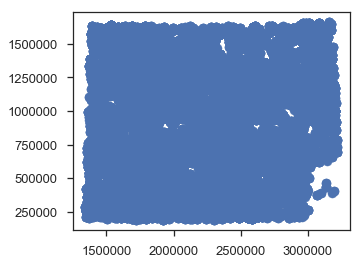

In [409]:
hucProbability['centroid_column'] = hucProbability.centroid
hucProbability = hucProbability.set_geometry('centroid_column')
hucProbability.plot();

In [ ]:

xlim = (min(wx),max(wx))
ylim = (min(wy),max(wy))

NYS = x_range,y_range = (xlim,ylim)

plot_width  = int(750)
plot_height = int(plot_width//1.2)
nybg_ys = wy
nybg_xs = wx

source = ColumnDataSource(
        data=dict(
            x=nybg_xs,
            y=nybg_ys,
            cnty=nybg_county,
            poor = nybg_poor,
            totalhh = nybg_hhe,
            circlesize=nybg_csize
        
        )
    )

f = figure(plot_height=plot_height, plot_width=plot_width, title="Total Households with Income under $25,000", 
           tools=TOOLS,x_axis_location=None,y_axis_location=None,x_range=x_range, y_range=y_range, outline_line_color=None)
f.title.text_font_style = "italic"
f.title.text_font_size = '14pt'
f.background_fill_color = 'gray'
f.grid.grid_line_color = None
f.add_tile(STAMEN_TERRAIN)
f.circle("x", "y",source=source, alpha=0.6, size="circlesize", fill_color = 'White',line_color = 'orange')
hover = f.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("County FIPS", "@cnty"),
    ("Poor Households", "@poor"),
    ("Total Households", "@totalhh"),
    ("(Easting,Northing)", "($x,$y)"),
]
show(f)